In [1]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot
from pandas import DataFrame
from numpy import log

In [5]:
df_southwest = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_southwest_clean.xlsx')

In [6]:
df_southwest = df_southwest.set_index(['date'])

# ARIMA

## Trainig and test set

In [7]:
X = df_southwest['pax_count']
size = int(len(X) * 0.8)
training_set, test_set = X[0:size], X[size:len(X)]

## Stationarity

In [8]:
stationarity = adfuller(X)
print('ADF Statistics: %f' % stationarity[0])
print('p-value: %f' % stationarity[1])
for key, value in stationarity[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistics: -0.584879
p-value: 0.874362
	1%: -3.466
	5%: -2.877
	10%: -2.575


## Differencing

In [9]:
df_southwest['pax_first_diff'] = X.diff()

In [10]:
Y = df_southwest['pax_first_diff'] 

In [11]:
Y = Y.dropna()

In [12]:
stationarity = adfuller(Y)
print('ADF Statistics: %f' % stationarity[0])
print('p-value: %f' % stationarity[1])
for key, value in stationarity[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistics: -2.592806
p-value: 0.094493
	1%: -3.466
	5%: -2.877
	10%: -2.575


<AxesSubplot:xlabel='date'>

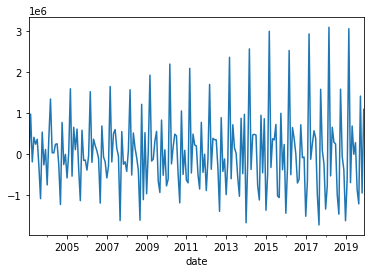

In [13]:
Y.plot()

## Augmented Dickey Fuller Test (AIC)

In [14]:
stepwise_fit = auto_arima(X, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6122.710, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6156.458, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6146.589, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6141.518, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6154.894, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6128.691, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6138.303, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6138.072, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6124.428, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6137.340, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6124.808, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6139.191, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6123.433, Time=0.24 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

## ACF & PACF

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [16]:
import statsmodels.api as sm

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


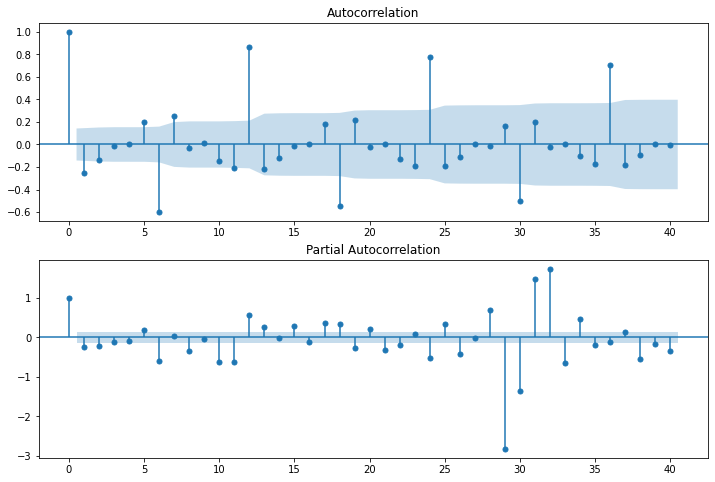

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Y.iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Y.iloc[13:],lags=40,ax=ax2)

ACF & PACF- Analyze bestätigt das Ergebnis vom AIC-Test **nicht** => ARIMA (2,1,2) & ARIMA(1,1,1) testen

## Model

In [18]:
model_arima_212 = ARIMA(X, order=(2,1,2))
model_arima_fit_212 = model_arima_212.fit()

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

In [19]:
model_arima_111 = ARIMA(X, order=(1,1,1))
model_arima_fit_111 = model_arima_111.fit()

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [20]:
model_arima_fit_212.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              pax_count   No. Observations:                  204
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3056.717
Date:                Sat, 26 Nov 2022   AIC                           6123.433
Time:                        17:33:16   BIC                           6139.999
Sample:                    01-01-2003   HQIC                          6130.135
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3612      0.136     -2.662      0.008      -0.627      -0.095
ar.L2          0.3368      0.084      4.021      0.000       0.173       0.501
ma.L1          0.1058      0.090      1.180      0.238      -0.070       0.282
ma.L2         -0.7900      0.075    -10.523      0.000      -0.937      -0.643
sigma2      6.929e+11   7.89e-14   8.78e+24      0.000    6.93e+11    6.93e+11
===================================================================================
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):                 1.39
Prob(Q):                              0.27   Prob(JB):                         0.50
Heteroskedasticity (H):               1.89   Skew:                             0.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.2e+40. Standard errors may be unstable.
"""

In [21]:
model_arima_fit_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              pax_count   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3062.204
Date:                Sat, 26 Nov 2022   AIC                           6130.407
Time:                        17:33:16   BIC                           6140.347
Sample:                    01-01-2003   HQIC                          6134.428
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4975      0.089      5.607      0.000       0.324       0.671
ma.L1         -0.8503      0.069    -12.336      0.000      -0.985      -0.715
sigma2      7.629e+11   3.83e-14   1.99e+25      0.000    7.63e+11    7.63e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 1.22
Prob(Q):                              0.53   Prob(JB):                         0.54
Heteroskedasticity (H):               2.02   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.79e+40. Standard errors may be unstable.
"""

## Residuals

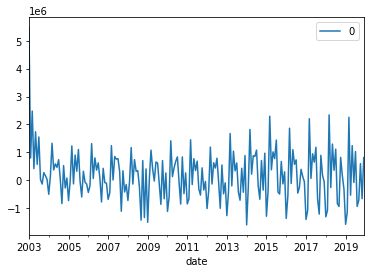

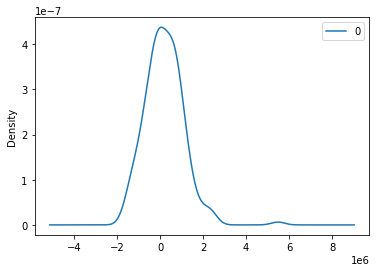

                  0
count  2.040000e+02
mean   1.909832e+05
std    9.034037e+05
min   -1.602925e+06
25%   -4.228810e+05
50%    1.406113e+05
75%    7.365404e+05
max    5.484294e+06


In [22]:
from matplotlib import pyplot
residuals = pd.DataFrame(model_arima_fit_212.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

## Forecast

In [23]:
predictions_arima_212 = df_southwest['forecast_arima'] = model_arima_fit_212.predict(start = 163, dynamic = False)

In [24]:
predictions_arima_111 = df_southwest['forecast_arima'] = model_arima_fit_111.predict(start = 163, dynamic = False)

In [25]:
predictions_arima_212.tail()

2019-08-01    1.475563e+07
2019-09-01    1.331035e+07
2019-10-01    1.341292e+07
2019-11-01    1.371432e+07
2019-12-01    1.333253e+07
Freq: MS, Name: predicted_mean, dtype: float64

## Visualization

<AxesSubplot:xlabel='date'>

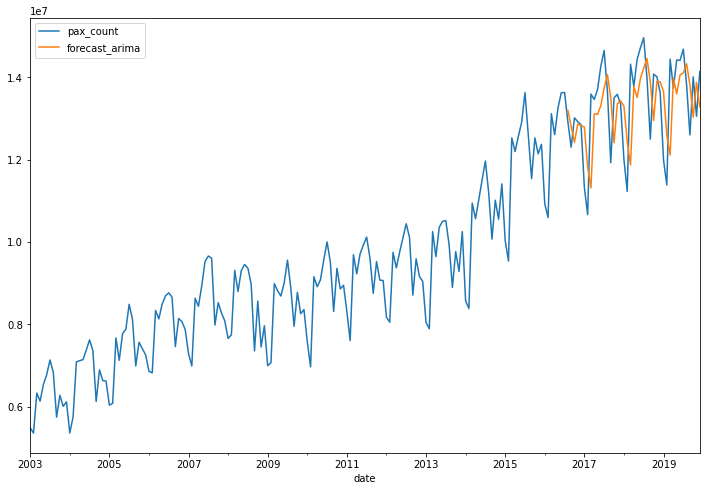

In [26]:
df_southwest[['pax_count', 'forecast_arima']].plot(figsize = (12,8))

## Model assessment

### MAE and RMSE

In [27]:
print(round(mean_absolute_error(test_set, predictions_arima_212),2))

835574.7


In [28]:
print(round(mean_absolute_error(test_set, predictions_arima_111),2))

851643.7


In [29]:
print(round(np.sqrt(mean_squared_error(test_set, predictions_arima_212)), 2))

1017175.32


In [30]:
print(round(np.sqrt(mean_squared_error(test_set, predictions_arima_111)), 2))

1048912.55


### MAPE function

In [31]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

In [32]:
round(MAPE(test_set, predictions_arima_212),2)

6.32

In [33]:
round(MAPE(test_set, predictions_arima_111),2)

6.5

## Export Forecast

In [34]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Southwest

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Southwest


In [35]:
predictions_arima_212.to_csv('predictions_arima.csv', index = True)

# SARIMA

In [36]:
import statsmodels.api as sm

## Model

In [37]:
stepwise_sarima = auto_arima(X, 
                          start_p=0, d=1, start_q=0, 
                          max_p=5, max_d =5, max_q=5,
                          start_P=0, D=1, start_Q=0, 
                          max_P =5, max_D=5, max_Q=5, 
                          m=12,seasonal=True, 
                          error_action='warn', trace = True,
                         supress_warnings=True, stepwise=True,
                         n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5414.569, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5388.556, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5381.869, Time=0.18 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5392.727, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5378.472, Time=0.39 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5384.791, Time=0.13 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=5379.450, Time=0.86 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=5379.490, Time=0.89 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5377.511, Time=0.36 sec
 ARIMA(0,1,1)(0,1,3)[12]             : AIC=5379.497, Time=0.81 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AIC=5380.629, Time=2.06 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=5400.317, Time=0.46 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=5377.767, Time=0.93 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=5377.616, Time=0.48 sec
 ARIMA(1,1,0)(0,1,2

In [38]:
model_sarima = sm.tsa.statespace.SARIMAX(X,order=(0, 1, 1),seasonal_order=(0,1,2,12))
results_sarima = model_sarima.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33202D+01    |proj g|=  7.26802D-01


/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  1.31606D+01    |proj g|=  1.45048D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      8      1     0     0   7.196D-07   1.316D+01
  F =   13.160566173574683     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [39]:
results_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                               pax_count   No. Observations:                  204
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -2684.755
Date:                                 Sat, 26 Nov 2022   AIC                           5377.511
Time:                                         17:33:27   BIC                           5390.520
Sample:                                     01-01-2003   HQIC                          5382.780
                                          - 12-01-2019                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2527      0.020    -12.610      0.000      -0.292      -0.213
ma.S.L12      -0.2245      0.040     -5.546      0.000      -0.304      -0.145
ma.S.L24      -0.1030      0.030     -3.472      0.001      -0.161      -0.045
sigma2      9.157e+10   9.64e-14    9.5e+23      0.000    9.16e+10    9.16e+10
===================================================================================
Ljung-Box (L1) (Q):                   9.28   Jarque-Bera (JB):                21.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.16
Prob(H) (two-sided):                  0.70   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.23e+39. Standard errors may be unstable.
"""

## Residuals

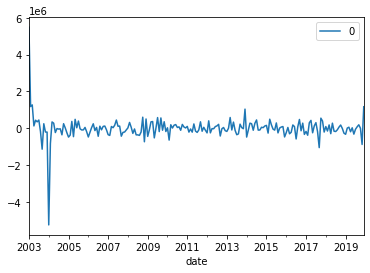

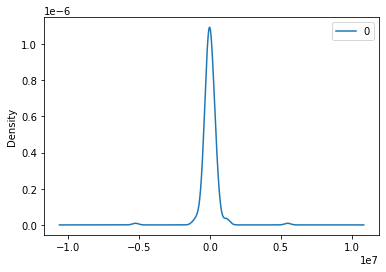

                  0
count  2.040000e+02
mean  -2.964481e+03
std    6.306077e+05
min   -5.250503e+06
25%   -2.061641e+05
50%   -5.551712e+02
75%    1.810284e+05
max    5.484294e+06


In [40]:
from matplotlib import pyplot
residuals = pd.DataFrame(results_sarima.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

## Forecast

In [41]:
predictions_sarima = df_southwest['forecast_sarima'] = results_sarima.predict(start = 163)

In [42]:
df_southwest['forecast_sarima'].tail()

date
2019-08-01    1.373870e+07
2019-09-01    1.241149e+07
2019-10-01    1.400994e+07
2019-11-01    1.393353e+07
2019-12-01    1.297270e+07
Name: forecast_sarima, dtype: float64

## Visualization

<AxesSubplot:xlabel='date'>

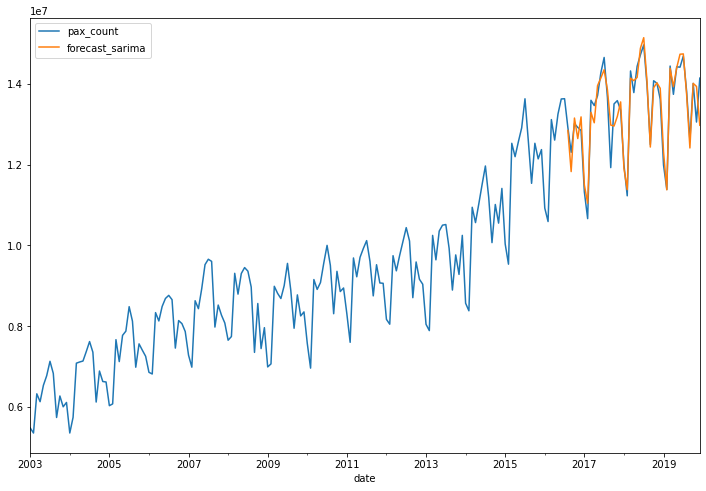

In [43]:
df_southwest[['pax_count', 'forecast_sarima']].plot(figsize = (12,8))

<AxesSubplot:xlabel='date'>

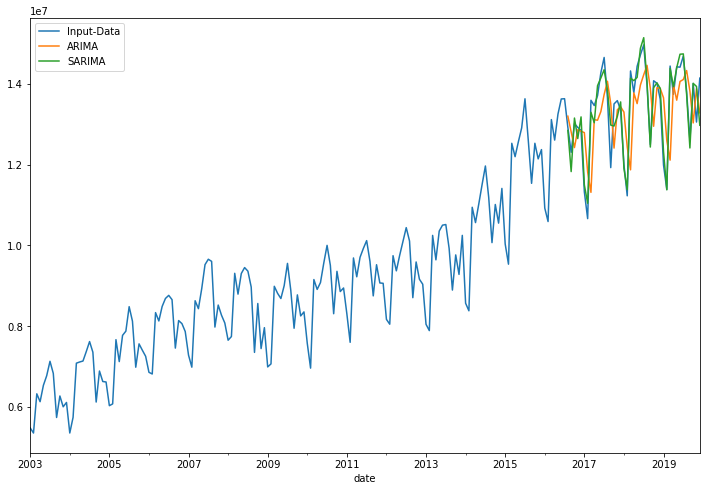

In [44]:
df_southwest['pax_count'].plot(legend = True, label = 'Input-Data',figsize = (12,8))
df_southwest['forecast_arima'].plot(legend = True, label = 'ARIMA')
df_southwest['forecast_sarima'].plot(legend = True, label = 'SARIMA')

## Model assessment

### MAE and RMSE

In [45]:
print(round(mean_absolute_error(test_set, predictions_sarima),2))

265149.38


In [46]:
print(round(np.sqrt(mean_squared_error(test_set, predictions_sarima)), 2))

367082.29


### MAPE function

In [47]:
round(MAPE(test_set, predictions_sarima),2)

2.02

### MAPE function

## Export Forecast

In [48]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Southwest

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Southwest


In [49]:
predictions_sarima.to_csv('predictions_sarima.csv', index = True)